Check the distributions prior and post training.

From `check_distributions_features.ipynb` in ai4pex-cnn repo.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Some functions

In [2]:
def dataset_to_dataframe(directory, fn):
    ds = xr.open_dataset(directory + fn)
    df = ds.to_dataframe()
    return df

## Analysis

In [4]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/coarsened_data/'
fn = 'MINT_1d_0061-0072_eke_tendency_c_SO_JET.nc'
df = dataset_to_dataframe(directory, fn)
df

gphit   glamt  eke_tendency
t                   y_c x_c                                 
0061-01-03 00:00:00 0   0   -47.422141   2.625  2.601189e-08
                        1   -47.422141   2.875  5.882740e-09
                        2   -47.422141   3.125  1.753329e-09
                        3   -47.422141   3.375 -1.259990e-09
                        4   -47.422141   3.625 -3.144903e-09
...                                ...     ...           ...
0073-01-01 00:00:00 53  55  -37.693867  16.375  5.769923e-07
                        56  -37.693867  16.625  3.021007e-07
                        57  -37.693867  16.875  9.673365e-08
                        58  -37.693867  17.125  1.932629e-08
                        59  -37.693867  17.375  1.105786e-08

[13993560 rows x 3 columns]

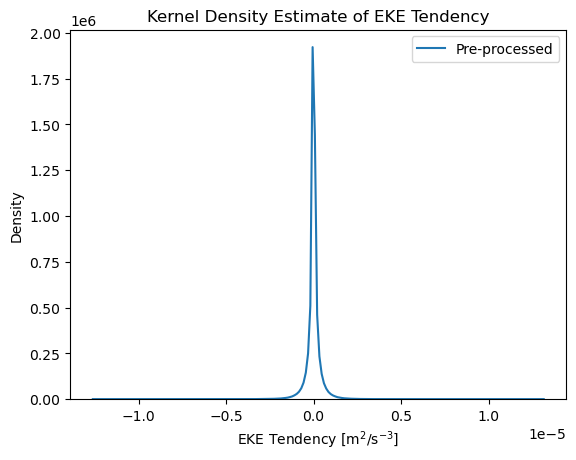

In [5]:
sns.kdeplot(df['eke_tendency'], label='Pre-processed', cut=0)

plt.title('Kernel Density Estimate of EKE Tendency')
plt.xlabel('EKE Tendency [m$^2$ s$^{-3}$]')
plt.ylabel('Density')
plt.legend()

#### Post processing

In [9]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/coarsened_data/'
fn = 'preprocessed_SO_JET_data_with_tendency.nc'
df = dataset_to_dataframe(directory, fn)
df

sa       vor  eke_tendency  eke_shift  \
r t                   y_c x_c                                                
0 0061-01-02 00:00:00 0   0   -1.749465 -0.088269           NaN   0.008770   
                          1   -1.715129  0.561656           NaN   0.009514   
                          2   -1.699563  0.848233           NaN   0.004796   
                          3   -1.676357  0.706880           NaN   0.002128   
                          4   -1.725131  0.557030           NaN   0.001462   
...                                 ...       ...           ...        ...   
  0073-01-01 00:00:00 39  35   0.215761  0.453404  2.395399e-09        NaN   
                          36   0.292962  0.071731  2.537797e-09        NaN   
                          37   0.259362 -0.413259  1.579623e-11        NaN   
                          38   0.215143 -0.411350 -8.317354e-09        NaN   
                          39   0.118742 -0.426581 -1.599856e-08        NaN   

                                    mke   mke_log  eke_shift_log      gphit  \
r t                   y_c x_c                                                 
0 0061-01-02 00:00:00 0   0    0.030491 -0.017385      -1.133259 -46.224777   
                          1    0.020215 -0.269656      -1.074252 -46.224777   
                          2    0.008879 -0.774654      -1.570741 -46.224777   
                          3    0.004770 -1.156048      -2.159840 -46.224777   
                          4    0.003407 -1.362678      -2.431855 -46.224777   
...                                 ...       ...            ...        ...   
  0073-01-01 00:00:00 39  35   0.020171 -0.270990       2.300254 -39.065640   
                          36   0.019802 -0.282336       2.300254 -39.065640   
                          37   0.016629 -0.389523       2.300254 -39.065640   
                          38   0.012620 -0.558879       2.300254 -39.065640   
                          39   0.010009 -0.701176       2.300254 -39.065640   

                                glamt  gdept_1d   gdept_0  z_c  
r t                   y_c x_c                                   
0 0061-01-02 00:00:00 0   0     3.375  5.033582  5.033582    0  
                          1     3.625  5.033582  5.033582    0  
                          2     3.875  5.033582  5.033582    0  
                          3     4.125  5.033582  5.033582    0  
                          4     4.375  5.033582  5.033582    0  
...                               ...       ...       ...  ...  
  0073-01-01 00:00:00 39  35   12.125  5.033582  5.033582    0  
                          36   12.375  5.033582  5.033582    0  
                          37   12.625  5.033582  5.033582    0  
                          38   12.875  5.033582  5.033582    0  
                          39   13.125  5.033582  5.033582    0  

[6912000 rows x 12 columns]

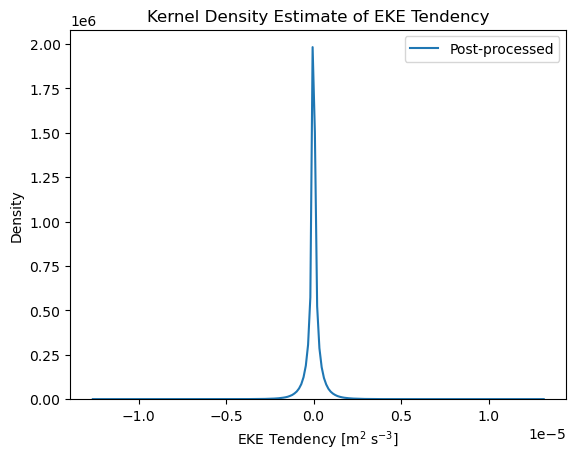

In [11]:
sns.kdeplot(df['eke_tendency'], label='Post-processed', cut=0)

plt.title('Kernel Density Estimate of EKE Tendency')
plt.xlabel('EKE Tendency [m$^2$ s$^{-3}$]')
plt.ylabel('Density')
plt.legend()